In [1]:
# mac optimization codes
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

import tensorflow as tf
print(tf.test.gpu_device_name())
print(tf.config.list_physical_devices('GPU'))

tensor([1.], device='mps:0')
/device:GPU:0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-11-07 09:53:17.739213: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-11-07 09:53:17.739236: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-07 09:53:17.739239: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-07 09:53:17.739305: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-07 09:53:17.739552: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
import supervision as sv
import os

In [3]:
CURRENT_DIR = os.getcwd()

In [4]:
GROUNDING_DINO_CONFIG_PATH = os.path.join(CURRENT_DIR, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CONFIG_PATH))

/Users/kohjunkai/Documents/GitHub/Neural-Network/junkai/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [5]:
SAM_CHECKPOINT_PATH = os.path.join(CURRENT_DIR, "weights", "sam_vit_h_4b8939.pth")
print(SAM_CHECKPOINT_PATH, "; exist:", os.path.isfile(SAM_CHECKPOINT_PATH))
GROUNDING_DINO_CHECKPOINT_PATH = os.path.join(CURRENT_DIR, "weights", "groundingdino_swint_ogc.pth")
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))
FAST_SAM_CHECKPOINT_PATH = os.path.join(CURRENT_DIR, "weights","FastSAM-x.pt")
print(FAST_SAM_CHECKPOINT_PATH, "; exist:", os.path.isfile(FAST_SAM_CHECKPOINT_PATH))

/Users/kohjunkai/Documents/GitHub/Neural-Network/junkai/weights/sam_vit_h_4b8939.pth ; exist: True
/Users/kohjunkai/Documents/GitHub/Neural-Network/junkai/weights/groundingdino_swint_ogc.pth ; exist: True
/Users/kohjunkai/Documents/GitHub/Neural-Network/junkai/weights/FastSAM-x.pt ; exist: True


In [6]:
from groundingdino.util.inference import Model
grounding_dino_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH, device=mps_device)

/Users/kohjunkai/Documents/GitHub/Neural-Network/junkai/GroundingDINO/groundingdino/models/GroundingDINO/ms_deform_attn.py:31: UserWarning: Failed to load custom C++ ops. Running on CPU mode Only!
  warnings.warn("Failed to load custom C++ ops. Running on CPU mode Only!")
/Users/kohjunkai/anaconda3/envs/gender_classification/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1695391816234/work/aten/src/ATen/native/TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


In [7]:
SAM_ENCODER_VERSION = "vit_h"

In [8]:
from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry[SAM_ENCODER_VERSION](checkpoint=SAM_CHECKPOINT_PATH).to(device=mps_device)
sam_predictor = SamPredictor(sam)

In [9]:
CELEBA_DATA_PATH = os.path.join(CURRENT_DIR, "data")
# Originally can use torchvision to download celebA but theres issues on the gdrive side
# import torchvision.datasets as datasets
# import torchvision.transforms as transforms
# transform = transforms.Compose([
#     transforms.Resize(64),
#     transforms.CenterCrop(64),
#     transforms.ToTensor()
# ])
# celeba_dataset = datasets.CelebA(root=CELEBA_DATA_PATH, split='train', target_type='attr', transform=transform, download=True)

In [10]:
# import tensorflow as tf
# import tensorflow_datasets as tfds# Load the dataset with its metadata
# # This will download the data if it's not already present in your system
# celeb_a_dataset, dataset_info = tfds.load('celeb_a', with_info=True, as_supervised=False)

# # Print the dataset metadata
# print(dataset_info)



In [47]:
SOURCE_IMAGE_PATH = f"{CURRENT_DIR}/data/celeba/img_align_celeba/000001.jpg"
CLASSES = ['person']
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

In [48]:
from typing import List
# including all to deal with instances
def enhance_class_name(class_names: List[str]) -> List[str]:
    return [
        f"all {class_name}s"
        for class_name
        in class_names
    ]

/Users/kohjunkai/anaconda3/envs/gender_classification/lib/python3.10/site-packages/transformers/modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/Users/kohjunkai/anaconda3/envs/gender_classification/lib/python3.10/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/Users/kohjunkai/anaconda3/envs/gender_classification/lib/python3.10/site-packages/torch/utils/checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


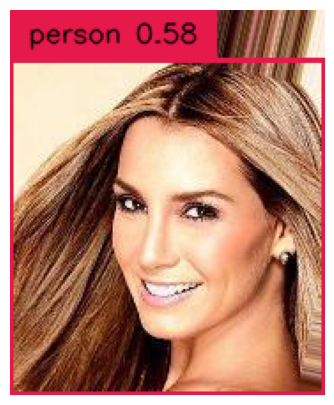

In [49]:
import cv2
import supervision as sv

# load image
image = cv2.imread(SOURCE_IMAGE_PATH)

# detect objects
detections = grounding_dino_model.predict_with_classes(
    image=image,
    classes=enhance_class_name(class_names=CLASSES),
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

# annotate image with detections
box_annotator = sv.BoxAnnotator()
labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}" 
    for _, _, confidence, class_id, _ 
    in detections]
annotated_frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_frame, (5, 5))

In [50]:
import numpy as np
from segment_anything import SamPredictor
import time


def segment(sam_predictor: SamPredictor, image: np.ndarray, xyxy: np.ndarray) -> np.ndarray:
    start_time = time.time()
    sam_predictor.set_image(image)
    result_masks = []
    for box in xyxy:
        masks, scores, logits = sam_predictor.predict(
            box=box,
            multimask_output=True
        )
        index = np.argmax(scores)
        result_masks.append(masks[index])
    end_time = time.time()
    print(f"Total SAM segmentation time: {end_time - start_time} seconds")
    return np.array(result_masks)

In [51]:
import sys
sys.path.append(f"{CURRENT_DIR}/FastSAM")

from fastsam import FastSAM, FastSAMPrompt
fast_sam_model = FastSAM(FAST_SAM_CHECKPOINT_PATH)

def fast_segment(fastsam_model, image_path, xyxy) -> np.ndarray:
    start_time = time.time()
    DEVICE = 'cpu'
    everything_results = fast_sam_model(image, device=DEVICE, retina_masks=True, imgsz=1024, conf=0.4, iou=0.9,)
    prompt_process = FastSAMPrompt(image, everything_results, device=DEVICE)
   
    result_masks = []
    for box in xyxy:
        # If detections.xyxy is a numpy array, convert it to a list using .tolist()
        if isinstance(box, np.ndarray):
            box = box.tolist()        
            ann = prompt_process.box_prompt(bbox=box)
            result_masks.append(ann)
    end_time = time.time()
    print(f"Total fastSAM bboxes segmentation time: {end_time - start_time} seconds")
    
    return np.squeeze(np.array(result_masks).astype(bool), axis=1)

def fast_segment_text(fastsam_model, image_path, text_prompt) -> np.ndarray:
    start_time = time.time()
    DEVICE = 'cpu'
    everything_results = fast_sam_model(image, device=DEVICE, retina_masks=True, imgsz=1024, conf=0.4, iou=0.9,)
    prompt_process = FastSAMPrompt(image, everything_results, device=DEVICE)
    ann = prompt_process.text_prompt(text=text_prompt)    
    end_time = time.time()
    print(f"Total fastSAM text prompt segmentation time: {end_time - start_time} seconds")
    return np.array(ann).astype(bool)

def fast_segment_everything(fastsam_model, image_path) -> np.ndarray:
    start_time = time.time()
    DEVICE = 'cpu'
    everything_results = fast_sam_model(image, device=DEVICE, retina_masks=True, imgsz=1024, conf=0.4, iou=0.9,)
    prompt_process = FastSAMPrompt(image, everything_results, device=DEVICE)
    ann = prompt_process.everything_prompt()
    end_time = time.time()
    print(f"Total fastSAM everything segmentation time: {end_time - start_time} seconds")
    return np.array(ann).astype(bool)

Total SAM segmentation time: 24.464776277542114 seconds


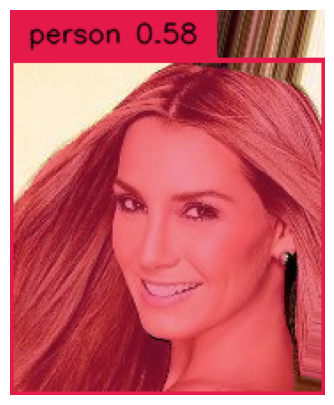

In [52]:
import cv2

# convert detections to masks
detections.mask = segment(
    sam_predictor=sam_predictor,
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
    xyxy=detections.xyxy
)
# annotate image with detections
box_annotator = sv.BoxAnnotator()
mask_annotator = sv.MaskAnnotator()
labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}" 
    for _, _, confidence, class_id, _ 
    in detections]
annotated_image = mask_annotator.annotate(scene=image.copy(), detections=detections)
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_image, (5, 5))


0: 1024x864 6 objects, 2598.3ms
Speed: 13.6ms preprocess, 2598.3ms inference, 16.7ms postprocess per image at shape (1, 3, 1024, 1024)


Total fastSAM bboxes segmentation time: 3.2792062759399414 seconds


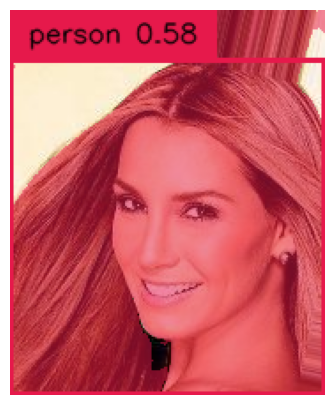

In [53]:
# convert with fast_segment instead 
detections.mask = fast_segment(fast_sam_model, SOURCE_IMAGE_PATH, detections.xyxy)
# annotate image with detections
box_annotator = sv.BoxAnnotator()
mask_annotator = sv.MaskAnnotator()
labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}" 
    for _, _, confidence, class_id, _ 
    in detections]
annotated_image = mask_annotator.annotate(scene=image.copy(), detections=detections)
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_image, (5, 5))


0: 1024x864 6 objects, 1385.3ms
Speed: 5.4ms preprocess, 1385.3ms inference, 2.1ms postprocess per image at shape (1, 3, 1024, 1024)


Total fastSAM text prompt segmentation time: 3.5543320178985596 seconds


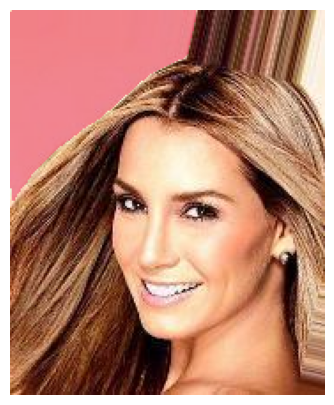

In [68]:
# convert with text prompt
detections.mask = fast_segment_text(fast_sam_model, SOURCE_IMAGE_PATH, "person face skin")
# annotate image with detections
mask_annotator = sv.MaskAnnotator()
annotated_image = mask_annotator.annotate(scene=image.copy(), detections=detections)

%matplotlib inline
sv.plot_image(annotated_image, (5, 5))


0: 1024x864 6 objects, 1460.0ms
Speed: 4.4ms preprocess, 1460.0ms inference, 3.1ms postprocess per image at shape (1, 3, 1024, 1024)


Total fastSAM everything segmentation time: 1.4755580425262451 seconds


/var/folders/7n/y_nksp1j6n3b41sv5w6cclc80000gn/T/ipykernel_29837/3647436354.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', num_masks)


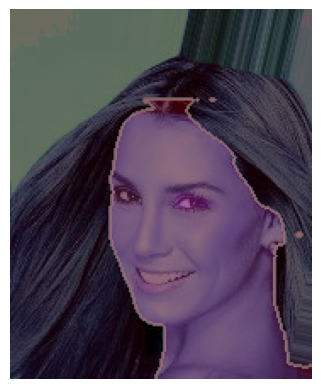

In [69]:
from skimage import io
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float, img_as_ubyte
import numpy as np
import matplotlib.pyplot as plt

# Load the image
new_image = io.imread(SOURCE_IMAGE_PATH)
# Normalize the image if necessary
image_min = np.min(new_image)
image_max = np.max(new_image)
if image_min < 0 or image_max > 1:
    # Normalize to 0-1 if the values are in 0-255 range
    if image_max > 1:
        new_image = new_image / 255

# # Define a list of RGBA colors for the masks
# colors = [
#     [1, 0, 0, 0.4],  # Semi-transparent red
#     [0, 1, 0, 0.1],  # Semi-transparent green
#     [0, 0, 1, 0.1],  # Semi-transparent blue
#     [1, 1, 0, 0.1]   # Semi-transparent yellow
# ]
masks = fast_segment_everything(fast_sam_model, SOURCE_IMAGE_PATH)

num_masks = len(masks)
cmap = plt.cm.get_cmap('hsv', num_masks)
colors = [cmap(i) for i in range(num_masks)]
alpha = 0.15  # Set the desired alpha value
colors = [(color[0], color[1], color[2], alpha) for color in colors]


# # Check if we have enough colors for the number of masks
# if len(colors) < len(masks):
#     raise ValueError("Not enough colors for the number of masks.")

# Overlay mask boundaries onto the image
for mask in masks:
    new_image = mark_boundaries(image, mask, color=(1, 1, 1), mode='thick')

# Overlay each mask onto the image
for mask, color in zip(masks, colors):
    # Create an overlay with the mask and the specified color
    colored_mask = np.zeros_like(new_image)
    for i in range(3):  # Only apply color to RGB channels
        colored_mask[..., i] = mask * color[i]
    
    # Blend the mask using the alpha value
    alpha = color[3]
    new_image = (1 - alpha) * new_image + alpha * colored_mask

# Ensure the image is in uint8 format for display purposes
image_display = img_as_ubyte(new_image)

# Display the image
plt.imshow(new_image)
plt.axis('off')
plt.show()
